# Agent-based modelling (ABM) of COVID-19

This is not designed to be a holistic simulation of COVID-19, but instead evidence as to the benefits of an interdisciplinary approach when formulating policy for wicked problems, such as COVID.

For more information, see covid.py.

## Modules (see covid.py)

In [51]:
from covid import COVIDPolicyABM
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# rcParams for visualisation

In [52]:
sns.set_style('whitegrid') 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 
plt.rcParams.update({
    'font.size': 11,          
    'axes.titlesize': 14,     
    'axes.labelsize': 12,     
    'xtick.labelsize': 10,    
    'ytick.labelsize': 10,    
    'legend.fontsize': 10,    
    'lines.linewidth': 2.5,   
})

## Standard scenario 

100%|██████████| 120/120 [00:00<00:00, 174.46it/s]


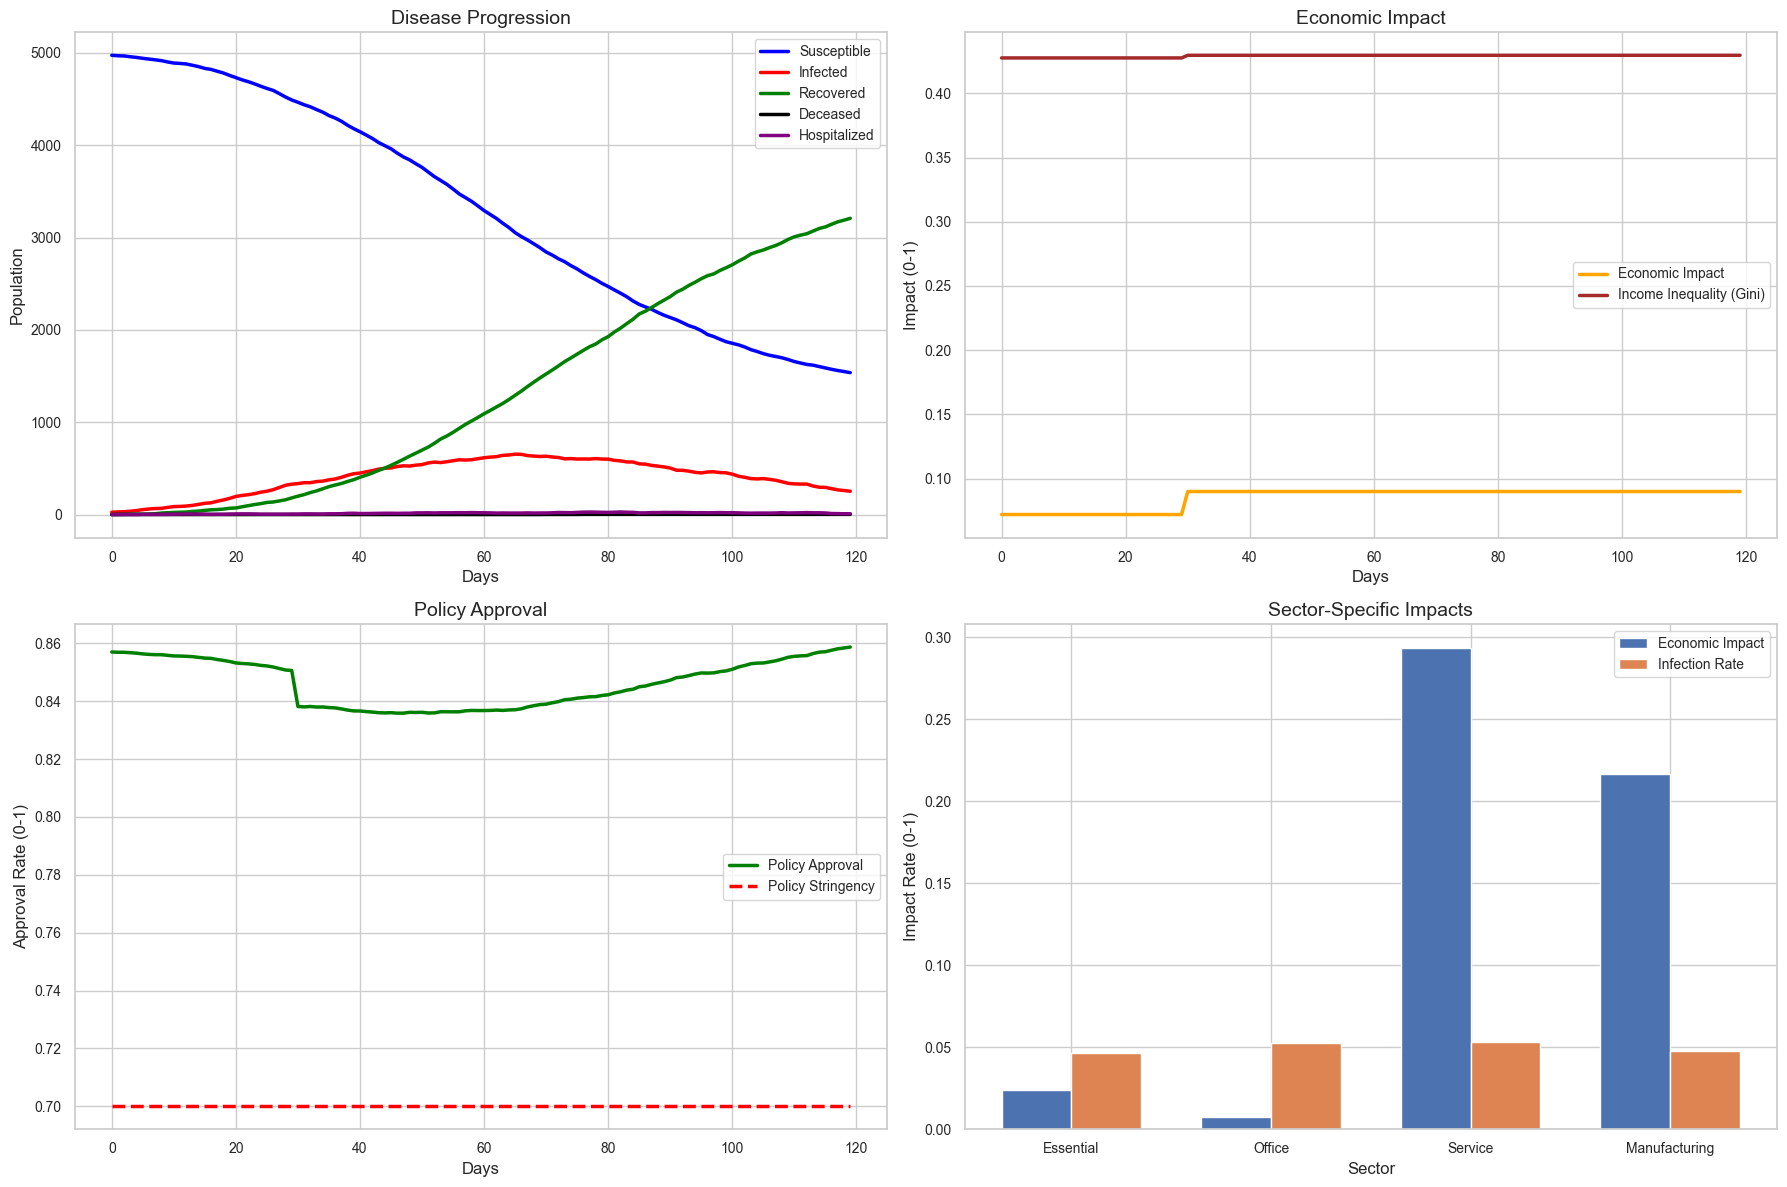

In [53]:
model = COVIDPolicyABM(population_size=5000, initial_infected=20)

policy_scenario = {
    0: {"stringency": 0.5, "economic_support": 0.5, "messaging": "neutral"},
    30: {"stringency": 0.7, "economic_support": 0.6, "messaging": "togetherness"}
}
results = model.run_simulation(days=120, policy_changes=policy_scenario)

fig = model.plot_results()
plt.show()
fig.savefig('img/standard_scenario.png', dpi=300, bbox_inches='tight')

## Scenario to evaluate IDR

In [54]:
print("Comparing COVID-19 policy strategies using agent-based modeling...")

# scenarios: no intervention, strict lockdown, balanced approach, targeted protection, adaptive strategy
policy_scenarios = {
	"No intervention": {
		0: {"stringency": 0.0, "economic_support": 0.0, "messaging": "neutral"}
	},
	"Strict lockdown": {
		0: {"stringency": 0.9, "economic_support": 0.5, "messaging": "fear"}
	},
	"Balanced approach": {
		0: {"stringency": 0.5, "economic_support": 0.7, "messaging": "togetherness"}
	},
	"Targeted protection": {
		0: {"stringency": 0.3, "economic_support": 0.6, "messaging": "vulnerable"}
	},
	"Adaptive strategy": {
		0: {"stringency": 0.3, "economic_support": 0.3, "messaging": "neutral"},
		30: {"stringency": 0.8, "economic_support": 0.8, "messaging": "togetherness"},
		60: {"stringency": 0.4, "economic_support": 0.6, "messaging": "vulnerable"}
	}
}

comparison_results = {}

# run each scenario
for scenario_name, policy_changes in policy_scenarios.items():
	print(f"\nSimulating {scenario_name} scenario...")
	model = COVIDPolicyABM(population_size=5000, initial_infected=20)
	results = model.run_simulation(days=120, policy_changes=policy_changes)
	comparison_results[scenario_name] = results

	print(f"  Health outcomes:")
	print(f"    - Total infected: {results['health_metrics']['percent_infected']:.1f}%")
	print(f"    - Mortality rate: {results['health_metrics']['mortality_rate']:.2f}%")
	print(f"  Economic outcomes:")
	print(f"    - Economic impact: {results['economic_metrics']['average_economic_impact']:.2f}")
	print(f"    - Inequality change: {results['economic_metrics']['inequality_change']:.3f}")
	print(f"  Social outcomes:")
	print(f"    - Final approval: {results['social_metrics']['final_policy_approval']:.2f}")


Comparing COVID-19 policy strategies using agent-based modeling...

Simulating No intervention scenario...


 77%|███████▋  | 92/120 [00:00<00:00, 249.43it/s]


Epidemic ended on day 92
  Health outcomes:
    - Total infected: 99.2%
    - Mortality rate: 0.28%
  Economic outcomes:
    - Economic impact: 0.00
    - Inequality change: 0.000
  Social outcomes:
    - Final approval: 0.94

Simulating Strict lockdown scenario...


100%|██████████| 120/120 [00:00<00:00, 161.02it/s]


  Health outcomes:
    - Total infected: 63.3%
    - Mortality rate: 0.12%
  Economic outcomes:
    - Economic impact: 0.13
    - Inequality change: 0.000
  Social outcomes:
    - Final approval: 0.83

Simulating Balanced approach scenario...


100%|██████████| 120/120 [00:00<00:00, 214.66it/s]


  Health outcomes:
    - Total infected: 92.4%
    - Mortality rate: 0.02%
  Economic outcomes:
    - Economic impact: 0.06
    - Inequality change: 0.000
  Social outcomes:
    - Final approval: 0.90

Simulating Targeted protection scenario...


 98%|█████████▊| 117/120 [00:00<00:00, 259.80it/s]


Epidemic ended on day 117
  Health outcomes:
    - Total infected: 97.0%
    - Mortality rate: 0.04%
  Economic outcomes:
    - Economic impact: 0.04
    - Inequality change: 0.000
  Social outcomes:
    - Final approval: 0.91

Simulating Adaptive strategy scenario...


100%|██████████| 120/120 [00:00<00:00, 179.59it/s]

  Health outcomes:
    - Total infected: 87.6%
    - Mortality rate: 0.16%
  Economic outcomes:
    - Economic impact: 0.06
    - Inequality change: -0.000
  Social outcomes:
    - Final approval: 0.89


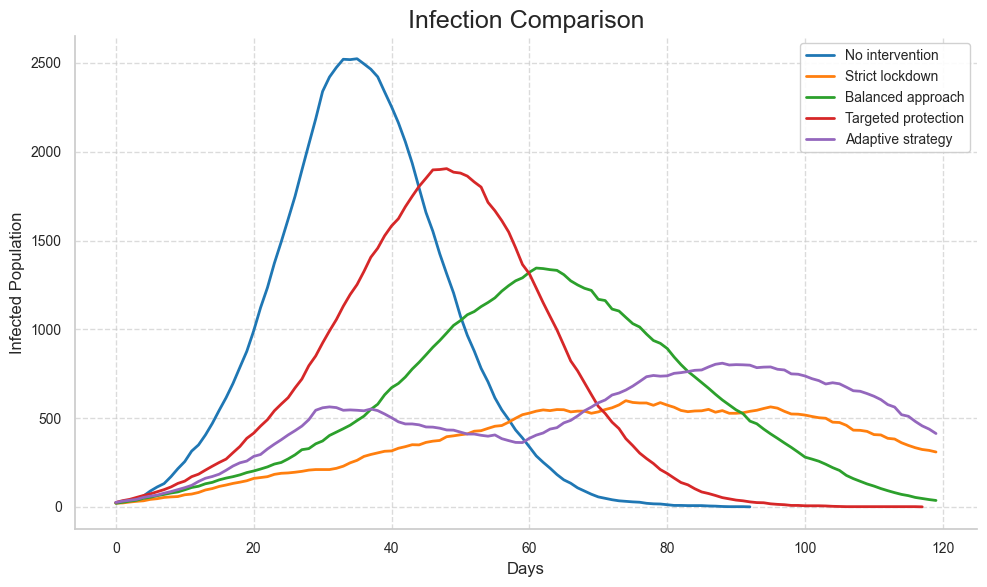

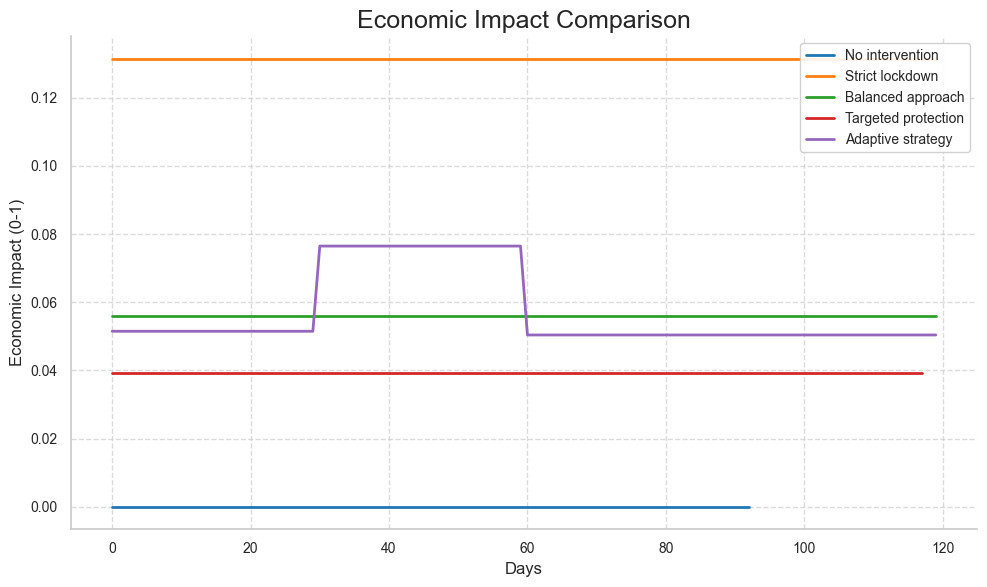

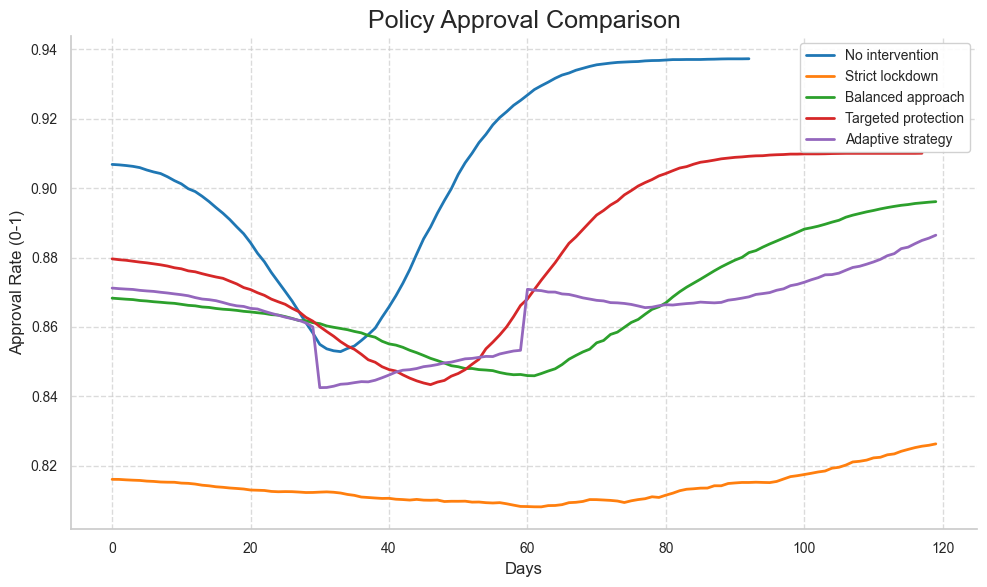

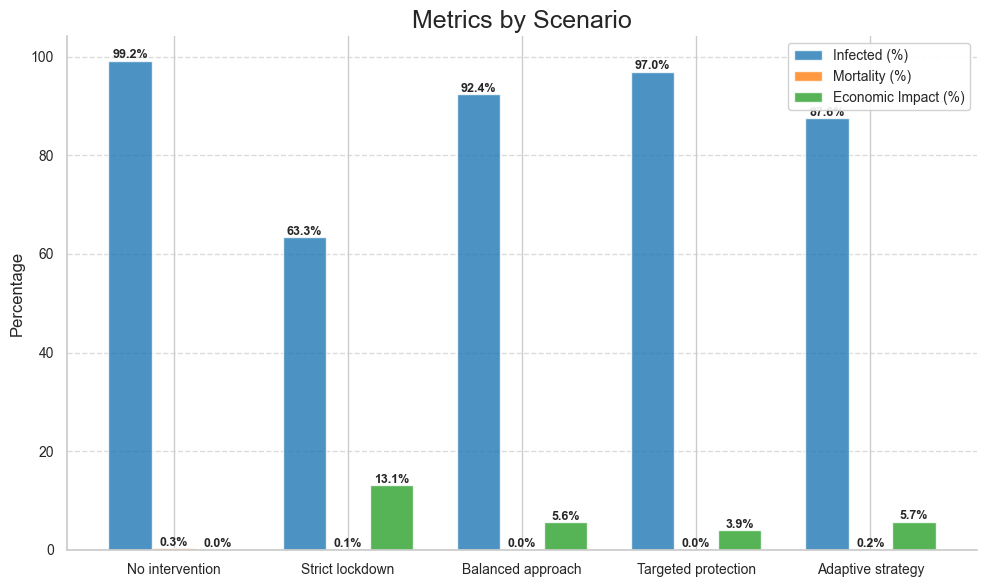

In [ ]:
# TODO: wrap as part of a/the class 
# to use the figures in the essay, split into 4 as opposed plots as opposed to one

# Set a consistent style for all plots

# (1): infection comparison
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(1, 1, 1)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax1.plot(results['time_series']['infected'], label=scenario, color=colors[i], linewidth=2)
ax1.set_title("Infection Comparison", fontsize=18)
ax1.set_xlabel("Days", fontsize=12)
ax1.set_ylabel("Infected Population", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper right', frameon=True, framealpha=0.9, fontsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tight_layout()
fig1.savefig('img/infection_comparison.png', dpi=300, bbox_inches='tight')

# (2) economic impact
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(1, 1, 1)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax2.plot(results['time_series']['economic_impact'], label=scenario, color=colors[i], linewidth=2)
ax2.set_title("Economic Impact Comparison", fontsize=18)
ax2.set_xlabel("Days", fontsize=12)
ax2.set_ylabel("Economic Impact (0-1)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right', frameon=True, framealpha=0.9, fontsize=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.tight_layout()
fig2.savefig('img/economic_impact.png', dpi=300, bbox_inches='tight')

# (3) approval 
fig3 = plt.figure(figsize=(10, 6))
ax3 = fig3.add_subplot(1, 1, 1)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax3.plot(results['time_series']['policy_approval'], label=scenario, color=colors[i], linewidth=2)
ax3.set_title("Policy Approval Comparison", fontsize=18)
ax3.set_xlabel("Days", fontsize=12)
ax3.set_ylabel("Approval Rate (0-1)", fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.legend(loc='upper right', frameon=True, framealpha=0.9, fontsize=10)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.tight_layout()
fig3.savefig('img/policy_approval.png', dpi=300, bbox_inches='tight')

# (4) metrics
fig4 = plt.figure(figsize=(10, 6))
ax4 = fig4.add_subplot(1, 1, 1)
scenarios = list(comparison_results.keys()) # scenarios as x-axis
x = np.arange(len(scenarios))
width = 0.25  # Slightly wider for better readability

# extract metrics for comparison
infected_rates = [results['health_metrics']['percent_infected'] for results in comparison_results.values()]
mortality_rates = [results['health_metrics']['mortality_rate'] for results in comparison_results.values()]
economic_impacts = [results['economic_metrics']['average_economic_impact'] * 100 for results in comparison_results.values()]

# Use color from the palette
ax4.bar(x - width, infected_rates, width, label="Infected (%)", color=colors[0], alpha=0.8)
ax4.bar(x, mortality_rates, width, label="Mortality (%)", color=colors[1], alpha=0.8)
ax4.bar(x + width, economic_impacts, width, label="Economic Impact (%)", color=colors[2], alpha=0.8)

ax4.set_xticks(x)
ax4.set_xticklabels(scenarios, fontsize=10)
ax4.set_title("Metrics by Scenario", fontsize=18)
ax4.set_ylabel("Percentage", fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

# iterate and add value labels on the bars for each metric
for i, v in enumerate(infected_rates):
    ax4.text(i - width, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')
for i, v in enumerate(mortality_rates):
    ax4.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')
for i, v in enumerate(economic_impacts):
    ax4.text(i + width, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')

ax4.legend(loc='upper right', frameon=True, framealpha=0.9, fontsize=10)
plt.tight_layout()
fig4.savefig('img/key_metrics.png', dpi=300, bbox_inches='tight')

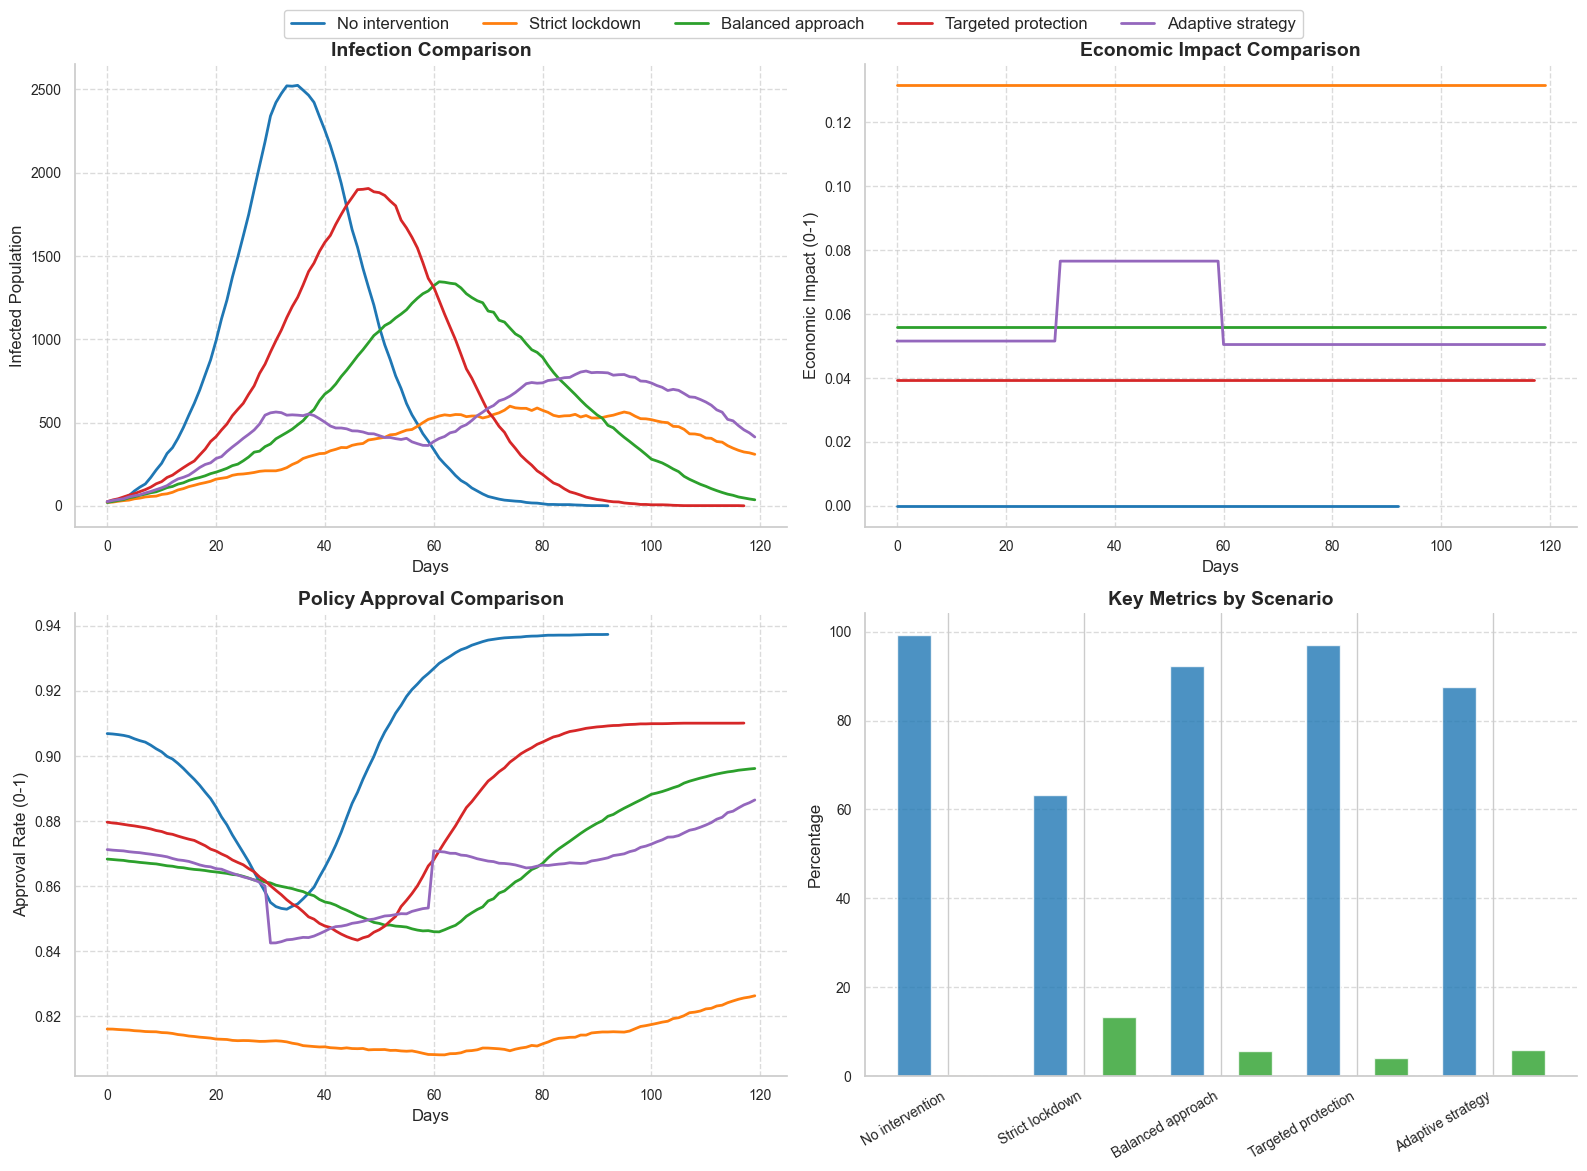

In [56]:
fig_combined = plt.figure(figsize=(16, 12))

# Infection comparison (top left)
ax1 = fig_combined.add_subplot(2, 2, 1)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax1.plot(results['time_series']['infected'], label=scenario, color=colors[i], linewidth=2)
ax1.set_title("Infection Comparison", fontsize=14, fontweight='bold')
ax1.set_xlabel("Days", fontsize=12)
ax1.set_ylabel("Infected Population", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Economic impact (top right)
ax2 = fig_combined.add_subplot(2, 2, 2)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax2.plot(results['time_series']['economic_impact'], label=scenario, color=colors[i], linewidth=2)
ax2.set_title("Economic Impact Comparison", fontsize=14, fontweight='bold')
ax2.set_xlabel("Days", fontsize=12)
ax2.set_ylabel("Economic Impact (0-1)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Policy approval (bottom left)
ax3 = fig_combined.add_subplot(2, 2, 3)
for i, (scenario, results) in enumerate(comparison_results.items()):
    ax3.plot(results['time_series']['policy_approval'], label=scenario, color=colors[i], linewidth=2)
ax3.set_title("Policy Approval Comparison", fontsize=14, fontweight='bold')
ax3.set_xlabel("Days", fontsize=12)
ax3.set_ylabel("Approval Rate (0-1)", fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Key metrics (bottom right)
ax4 = fig_combined.add_subplot(2, 2, 4)
ax4.bar(x - width, infected_rates, width, label="Infected (%)", color=colors[0], alpha=0.8)
ax4.bar(x, mortality_rates, width, label="Mortality (%)", color=colors[1], alpha=0.8)
ax4.bar(x + width, economic_impacts, width, label="Economic Impact (%)", color=colors[2], alpha=0.8)
ax4.set_xticks(x)
ax4.set_xticklabels(scenarios, rotation=30, ha="right", fontsize=10)
ax4.set_title("Key Metrics by Scenario", fontsize=14, fontweight='bold')
ax4.set_ylabel("Percentage", fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

# Add single legend for the entire figure
handles, labels = ax1.get_legend_handles_labels()
fig_combined.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), 
                    ncol=5, frameon=True, framealpha=0.9, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the legend
fig_combined.savefig('img/combined_analysis.png', dpi=300, bbox_inches='tight')